<a href="https://colab.research.google.com/github/maulannafr/PengukuraanKemiripanCitra/blob/main/Mengukur_Kemiripan_Citra_dan_Penerapannya_Dalam_Pengenalan_Pola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


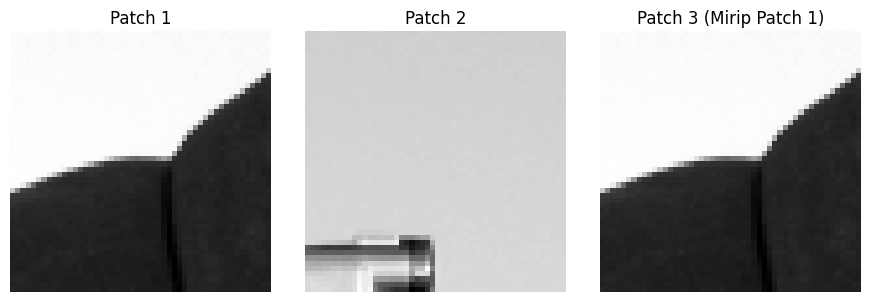

In [ ]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. Buat dua patch citra sederhana atau ambil dari citra asli
image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350]  # Patch dari lokasi berbeda
patch3 = patch1 + 0.1  # Patch1 dengan sedikit noise/perubahan intensitas
patch3 = np.clip(patch3, 0, 1)  # Pastikan nilai tetap di [0, 1]

# 2. Flatten patch menjadi vektor 1D
vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

# 3. Hitung Jarak Euclidean (L2)
dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)

# 4. Hitung Jarak Manhattan (L1 - disebut 'cityblock' di scipy)c
dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

# 5. Tampilkan hasil dan patch
print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch 1')
axes[0].axis('off')
axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch 2')
axes[1].axis('off')
axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch 3 (Mirip Patch 1)')
axes[2].axis('off')
plt.tight_layout()
plt.show()


Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): 1.0000
Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): 1.0000


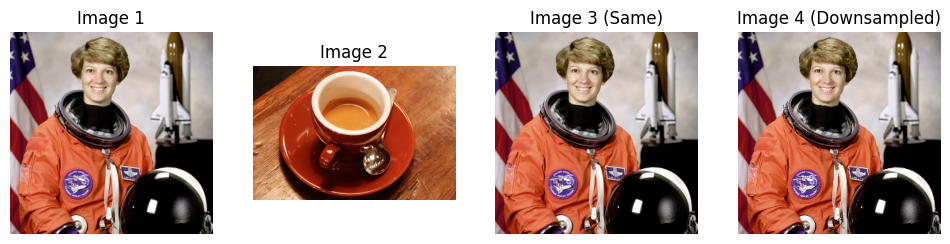

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte, io, color
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB gabungan
def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:,:,2].ravel(), bins=bins, range=(0, 256))
    # Gabungkan histogram R, G, B menjadi satu vektor fitur
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    # Normalisasi (opsional, tapi sering dilakukan)
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

# 1. Muat dua citra berwarna
try:
    # Gunakan citra berbeda dari skimage atau file Anda
    image1 = data.astronaut()
    image2 = data.coffee()  # Citra yang berbeda
    image3 = data.astronaut()  # Citra yang sama (untuk perbandingan)
    image4 = image1[::2, ::2, :]  # Versi downsampled dari image1
except Exception as e:
    print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2,::2,:]

# 2. Hitung histogram untuk setiap citra
hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

# 3. Hitung Cosine Similarity (1 - Cosine Distance)
# scipy.spatial.distance.cosine menghitung jarak (1 - similarity)
sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

# 4. Tampilkan hasil
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): {sim_14:.4f}")

# Visualisasi (opsional)
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1); axes[0].set_title('Image 1'); axes[0].axis('off')
axes[1].imshow(image2); axes[1].set_title('Image 2'); axes[1].axis('off')
axes[2].imshow(image3); axes[2].set_title('Image 3 (Same)'); axes[2].axis('off')
axes[3].imshow(image4); axes[3].set_title('Image 4 (Downsampled)'); axes[3].axis('off')
plt.show()


SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2951
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


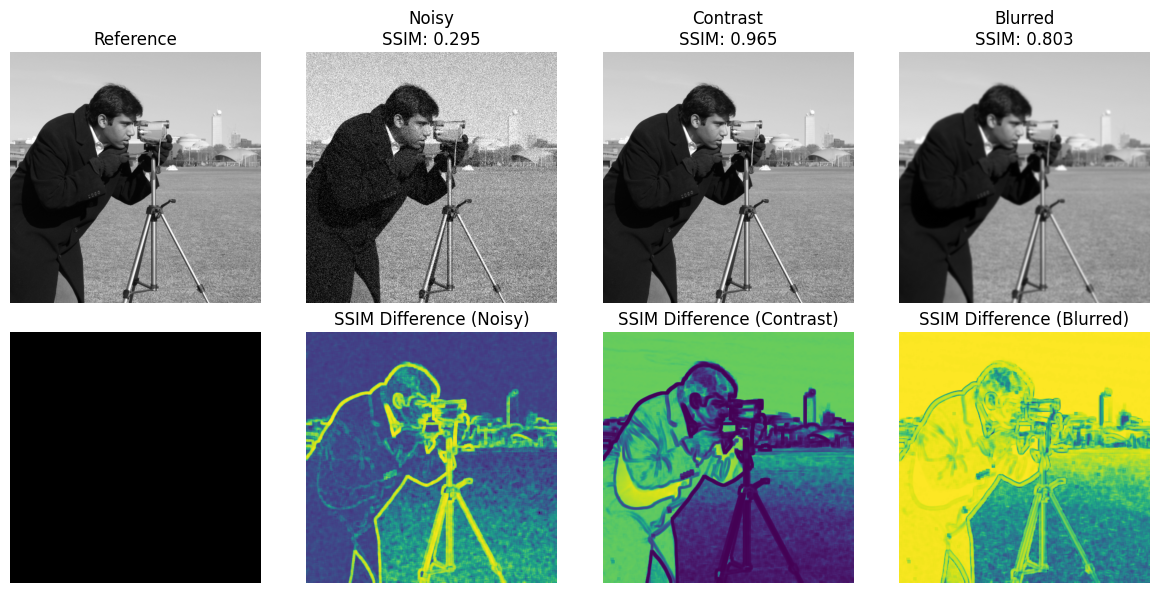

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

# 1. Muat citra referensi
image_ref = img_as_float(data.camera())

# 2. Buat beberapa versi citra yang 'terdistorsi'
# a) Citra yang sama (SSIM harus 1)
image_same = image_ref.copy()
# b) Citra dengan noise Gaussian
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)
# c) Citra dengan kontras berbeda (contoh: dikalikan skalar)
image_contrast = np.clip(image_ref * 0.8, 0, 1)
# d) Citra yang di-blur
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)

# 3. Hitung SSIM antara citra referensi dan citra terdistorsi
# SSIM memerlukan data_range
data_range = image_ref.max() - image_ref.min()

ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

# 4. Tampilkan hasil SSIM dan citra perbedaan
print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(image_ref, cmap='gray')
ax[0].set_title('Reference')
ax[0].axis('off')

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}')
ax[1].axis('off')

ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}')
ax[2].axis('off')

ax[3].imshow(image_blurred, cmap='gray')
ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}')
ax[3].axis('off')

# Menampilkan peta perbedaan SSIM
ax[4].imshow(np.zeros_like(image_ref), cmap='gray')
ax[4].set_title('')
ax[4].axis('off')

ax[5].imshow(diff_noisy, cmap='viridis')
ax[5].set_title('SSIM Difference (Noisy)')
ax[5].axis('off')

ax[6].imshow(diff_contrast, cmap='viridis')
ax[6].set_title('SSIM Difference (Contrast)')
ax[6].axis('off')

ax[7].imshow(diff_blurred, cmap='viridis')
ax[7].set_title('SSIM Difference (Blurred)')
ax[7].axis('off')

plt.tight_layout()


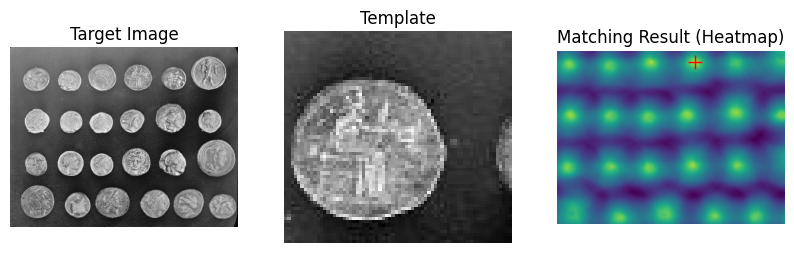

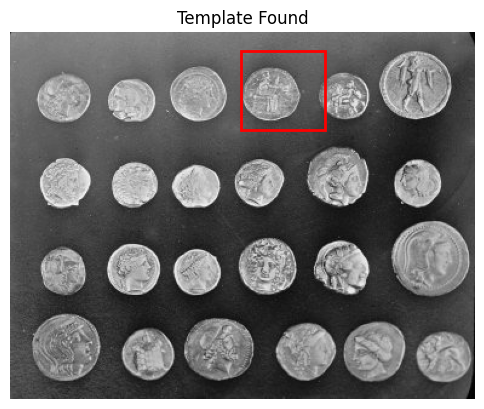

Template ditemukan di koordinat (x,y): (190, 15)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# 1. Muat citra target dan buat/muat citra template
image = data.coins()
# Ambil salah satu koin sebagai template (sesuaikan koordinat jika perlu)
template = image[15:80, 190:260]

# 2. Lakukan template matching menggunakan Normalized Cross-Correlation (metode default)
result = match_template(image, template)

# 3. Temukan lokasi dengan skor matching tertinggi
# np.argmax menemukan indeks linear, unravel_index mengubahnya ke koordinat 2D
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1] # Koordinat (x, y) dari sudut kiri atas template yang cocok

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

# Menampilkan heatmap hasil matching (opsional)
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].set_axis_off()
# Tandai lokasi terbaik pada heatmap
ax[2].plot(x, y, 'r+', markersize=10) # y, x karena ij adalah (row, col)

# Menampilkan kotak di lokasi terbaik pada citra asli (di plot terpisah agar lebih jelas)
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template ditemukan di koordinat (x,y): ({x}, {y})")


UJI ROTASI PRAKTIKUM 4

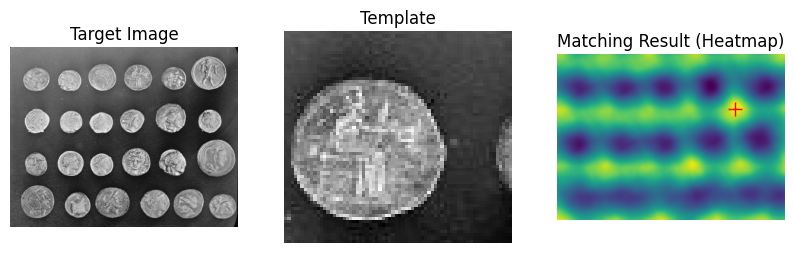

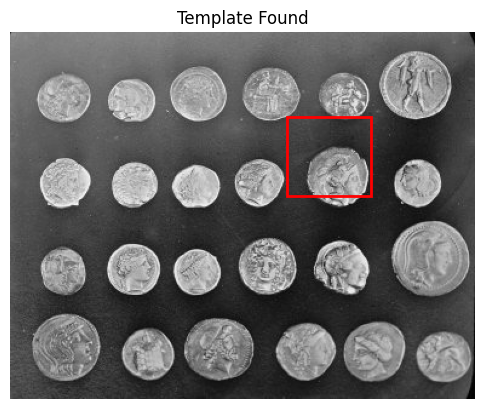

Template ditemukan di koordinat (x,y): (228, 70)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rotate

# 1. Muat citra target dan buat/muat citra template
image = data.coins()
# Ambil salah satu koin sebagai template (sesuaikan koordinat jika perlu)
template = image[15:80, 190:260]

# Rotasi template sebesar 30 derajat
template_rotated = rotate(template, angle=30, resize=True)

# Gunakan template yang telah dirotasi
result = match_template(image, template_rotated)

# 3. Temukan lokasi dengan skor matching tertinggi
# np.argmax menemukan indeks linear, unravel_index mengubahnya ke koordinat 2D
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1] # Koordinat (x, y) dari sudut kiri atas template yang cocok

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

# Menampilkan heatmap hasil matching (opsional)
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].set_axis_off()
# Tandai lokasi terbaik pada heatmap
ax[2].plot(x, y, 'r+', markersize=10) # y, x karena ij adalah (row, col)

# Menampilkan kotak di lokasi terbaik pada citra asli (di plot terpisah agar lebih jelas)
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template ditemukan di koordinat (x,y): ({x}, {y})")

Uji SCALING praktikum 4

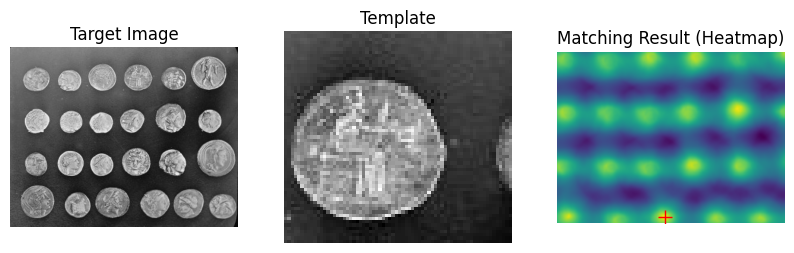

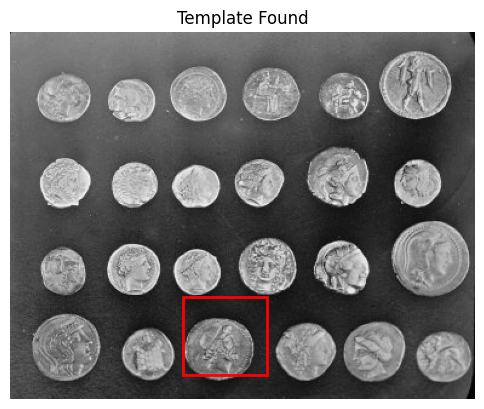

Template ditemukan di koordinat (x,y): (142, 218)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rescale
from skimage.util import img_as_ubyte

# 1. Muat citra target dan buat/muat citra template
image = data.coins()
# Ambil salah satu koin sebagai template (sesuaikan koordinat jika perlu)
template = image[15:80, 190:260]

# Ubah ukuran template (skala 1.2x)
template_scaled = rescale(template, scale=1.2, anti_aliasing=True)

# Sesuaikan agar template menjadi uint8 lagi (jika perlu)
template_scaled = img_as_ubyte(template_scaled)


# Gunakan template yang telah diskalakan
result = match_template(image, template_scaled)

# 3. Temukan lokasi dengan skor matching tertinggi
# np.argmax menemukan indeks linear, unravel_index mengubahnya ke koordinat 2D
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1] # Koordinat (x, y) dari sudut kiri atas template yang cocok

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

# Menampilkan heatmap hasil matching (opsional)
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].set_axis_off()
# Tandai lokasi terbaik pada heatmap
ax[2].plot(x, y, 'r+', markersize=10) # y, x karena ij adalah (row, col)

# Menampilkan kotak di lokasi terbaik pada citra asli (di plot terpisah agar lebih jelas)
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template ditemukan di koordinat (x,y): ({x}, {y})")

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (semakin ke kanan, semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


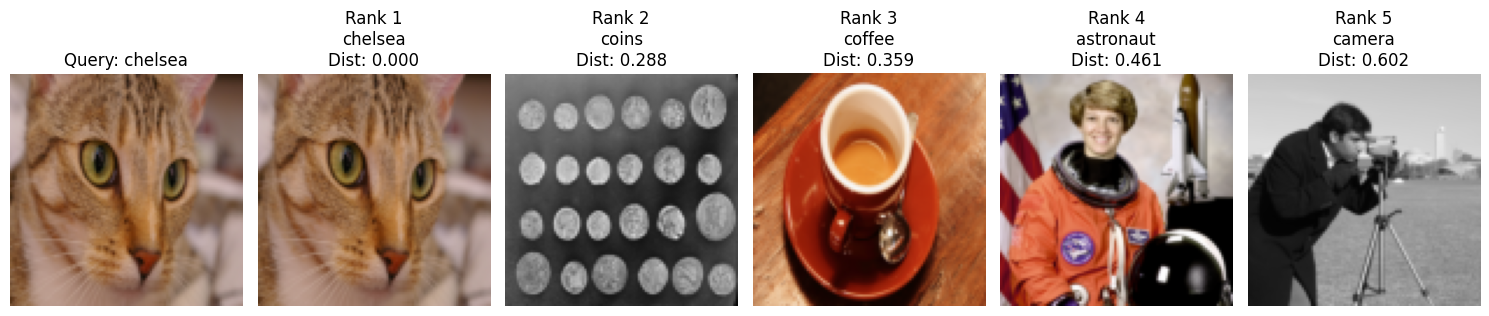

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform
from skimage.util import img_as_ubyte
from scipy.spatial import distance

# Fungsi hitung histogram dari Praktikum 2
def calculate_rgb_histogram(image, bins=16):
    # Pastikan input float [0,1] dikonversi ke uint8 [0,255] untuk histogram
    if image.dtype == float:
        image = img_as_ubyte(image)
    hist_r, _ = np.histogram(image[:, :, 0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))

    # Normalisasi L1 (sum to 1)
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined = hist_combined.astype(float) / hist_sum
    else:
        hist_combined = hist_combined.astype(float)  # Avoid division by zero
    return hist_combined

# 1. Siapkan 'database' citra kecil dan citra query
# Gunakan beberapa gambar dari skimage.data atau gambar Anda sendiri
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        # Pastikan semua citra berwarna (RGB) dan ukuran sama (opsional, resize)
        if img.ndim == 2:  # Jika grayscale, konversi ke RGB
            img = color.gray2rgb(img)
        # Resize agar ukuran fitur konsisten (misal 100x100)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih satu citra sebagai query (misal, 'chelsea' si kucing)
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# 2. Hitung jarak/kemiripan antara query dan semua citra di database
# Kita gunakan Cosine Distance (1 - Cosine Similarity)
distances = []
for i, hist in enumerate(database_hists):
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

# 3. Urutkan citra berdasarkan jarak (dari terkecil ke terbesar)
sorted_indices = np.argsort(distances)

# 4. Tampilkan hasil: Query dan citra terurut berdasarkan kemiripan
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

# Tampilkan query
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

# Tampilkan hasil terurut
print("\nHasil Retrieval (semakin ke kanan, semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1  # Rank dimulai dari 1
    ax = axes[img_rank]  # Mulai dari plot ke-2
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

# Matikan axes yang tidak terpakai jika num_results < len(db)
for j in range(num_results_to_show + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()


Tugas Experiment no 3

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (Mean RGB + Euclidean):
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 0.050)
Rank 3: coffee (Distance: 0.176)
Rank 4: camera (Distance: 0.194)
Rank 5: coins (Distance: 0.211)


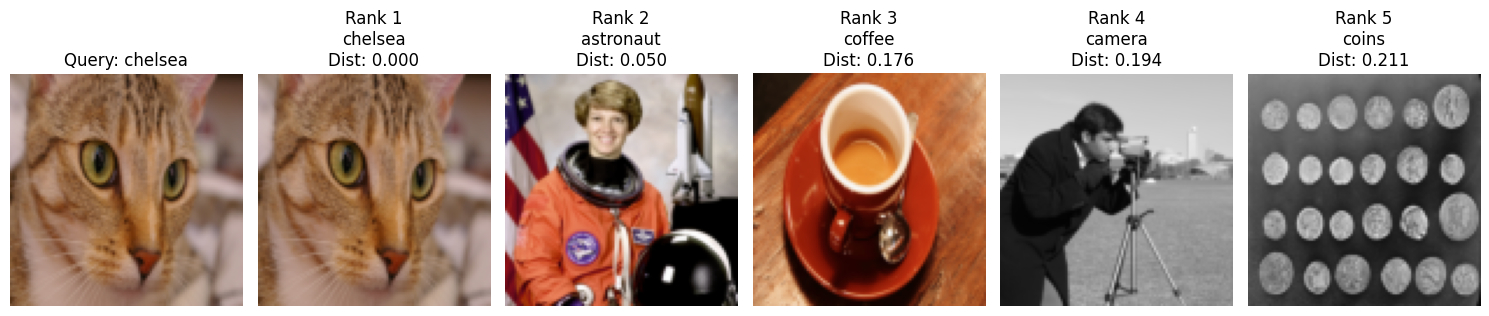

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform
from skimage.util import img_as_float
from scipy.spatial import distance

# Fungsi untuk menghitung rata-rata R, G, B sebagai fitur
def calculate_rgb_mean(image):
    if image.dtype != float:
        image = img_as_float(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# 1. Siapkan 'database' citra kecil dan citra query
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_features = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_features.append(calculate_rgb_mean(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# Pilih satu citra sebagai query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_feature = database_features[query_index]

# 2. Hitung jarak Euclidean antara query dan semua citra
distances = []
for i, feat in enumerate(database_features):
    dist = distance.euclidean(query_feature, feat)
    distances.append(dist)

# 3. Urutkan citra berdasarkan jarak (dari terkecil ke terbesar)
sorted_indices = np.argsort(distances)

# 4. Tampilkan hasil
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

# Tampilkan query
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

# Tampilkan hasil terurut
print("\nHasil Retrieval (Mean RGB + Euclidean):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
